In [181]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from cryptocmd import CmcScraper
import numpy as np

In [182]:
from MCForecastTools import MCSimulation

In [183]:
%matplotlib inline 

In [184]:
# Load .env enviroment variables
load_dotenv()

True

## Microstrategy 
## ![image](https://www.thestreet.com/.image/c_limit%2Ccs_srgb%2Cq_auto:good%2Cw_700/MTgwOTg3OTY1NDk1ODQ2MjQ4/microstrat2.webp)

In [185]:
microstrategy_value = 4600000000 
microstrategy_value

4600000000

In [186]:
microstrategy_btc_holdings = 91850
microstrategy_btc_holdings

91850

In [187]:
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [188]:
#response_data = requests.get(btc_url).json
response_data_btc = requests.get(btc_url)
response_data_btc
response_content_btc = response_data_btc.content
response_content_btc
data_btc = response_data_btc.json()
import json
print(json.dumps(data_btc, indent=4))
response_data_eth = requests.get(eth_url)
response_content_eth = response_data_eth.content
data_eth = response_data_eth.json()
import json
print(json.dumps(data_eth, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18725256,
            "total_supply": 18725256,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 37337.0,
                    "volume_24h": 30893501321,
                    "market_cap": 699145755235,
                    "percentage_change_1h": -0.148922578157181,
                    "percentage_change_24h": 2.29562969751426,
                    "percentage_change_7d": -5.25259758890707,
                    "percent_change_1h": -0.148922578157181,
                    "percent_change_24h": 2.29562969751426,
                    "percent_change_7d": -5.25259758890707
                },
                "CAD": {
                    "price": 44968.6828,
                    "volume_24h": 37208132991.0124,
                   

In [189]:
btc_value = btc_value = data_btc["data"]["1"]["quotes"]["USD"]["price"]
microstrategy_btc_crypto_value = microstrategy_btc_holdings * btc_value
microstrategy_btc_crypto_value

3429403450.0

## Tesla 
## ![image](https://www.thestreet.com/.image/c_limit%2Ccs_srgb%2Cq_auto:good%2Cw_700/MTgwNzU3MjE5NDUxNjEwMjAw/340kn-.webp)

In [190]:
tesla_btc_holdings = 43200
tesla_btc_holdings 

43200

In [279]:
tesla_btc_crypto_value = tesla_btc_holdings * btc_value
tesla_btc_crypto_value

1612958400.0

In [192]:
tesla_microstrategy_difference = microstrategy_btc_crypto_value - tesla_btc_crypto_value
tesla_microstrategy_difference

1816445050.0

## Square 
## ![image](https://www.thestreet.com/.image/c_limit%2Ccs_srgb%2Cq_auto:good%2Cw_700/MTgwNzYwMzgzNzY4NzY1ODAw/nqngl-.webp)

In [286]:
square_btc_holdings = 8200
square_btc_holdings

8200

In [287]:
square_crypto_value = square_btc_holdings * btc_value
square_crypto_value

306163400.0

In [193]:
scraper=CmcScraper('BTC')
scrapereth=CmcScraper('ETH')
scraperada=CmcScraper('ADA')
scraperlink=CmcScraper('LINK')
scraperxrp=CmcScraper('XRP')

In [194]:
btcdata=scraper.get_dataframe()
ethdata=scrapereth.get_dataframe()
adadata=scraperada.get_dataframe()
linkdata=scraperlink.get_dataframe()
xrpdata=scraperxrp.get_dataframe()

In [195]:
btcdata.drop(columns=['Open','High','Low'],inplace=True)
ethdata.drop(columns=['Open','High','Low'],inplace=True)
adadata.drop(columns=['Open','High','Low'],inplace=True)
linkdata.drop(columns=['Open','High','Low'],inplace=True)
xrpdata.drop(columns=['Open','High','Low'],inplace=True) 

In [196]:
btcdata.set_index('Date',inplace=True)
ethdata.set_index('Date',inplace=True)
adadata.set_index('Date',inplace=True)
linkdata.set_index('Date',inplace=True)
xrpdata.set_index('Date',inplace=True)

In [197]:
joineddata=pd.concat([btcdata,ethdata,adadata,linkdata,xrpdata], axis=1, keys=['BTC', 'ETH','ADA','LINK','XRP']) 

In [198]:
joineddata.head() 

BTC                        ETH                     ADA  \
                 Close Volume    Market Cap Close Volume Market Cap Close   
Date                                                                        
2013-04-28  134.210007    0.0  1.488567e+09   NaN    NaN        NaN   NaN   
2013-04-29  144.539993    0.0  1.603769e+09   NaN    NaN        NaN   NaN   
2013-04-30  139.000000    0.0  1.542813e+09   NaN    NaN        NaN   NaN   
2013-05-01  116.989998    0.0  1.298955e+09   NaN    NaN        NaN   NaN   
2013-05-02  105.209999    0.0  1.168517e+09   NaN    NaN        NaN   NaN   

                              LINK                     XRP                    
           Volume Market Cap Close Volume Market Cap Close Volume Market Cap  
Date                                                                          
2013-04-28    NaN        NaN   NaN    NaN        NaN   NaN    NaN        NaN  
2013-04-29    NaN        NaN   NaN    NaN        NaN   NaN    NaN        NaN  
2013-04-30    NaN        NaN   NaN    NaN        NaN   NaN    NaN        NaN  
2013-05-01    NaN        NaN   NaN    NaN        NaN   NaN    NaN        NaN  
2013-05-02    NaN        NaN   NaN    NaN        NaN   NaN    NaN        NaN

In [199]:
closed_data=pd.DataFrame()

In [200]:
closed_data['BTC']=joineddata['BTC']['Close']
closed_data['BTC']=joineddata['BTC']['Close']
closed_data['ETH']=joineddata['ETH']['Close']
closed_data['ADA']=joineddata['ADA']['Close']
closed_data['LINK']=joineddata['LINK']['Close']
closed_data['XRP']=joineddata['XRP']['Close']

In [201]:
btcdaily_returns = joineddata['BTC']['Close'].pct_change().dropna()
ethdaily_returns = joineddata['ETH']['Close'].pct_change().dropna()
adadaily_returns = joineddata['ADA']['Close'].pct_change().dropna()
linkdaily_returns = joineddata['LINK']['Close'].pct_change().dropna()
xrpdaily_returns = joineddata['XRP']['Close'].pct_change().dropna()
closed_data_returns=closed_data.pct_change().dropna()

In [202]:
correlation=closed_data.dropna().corr()
correlation

,BTC,ETH,ADA,LINK,XRP
BTC,1.000000,0.885808,0.862337,0.930280,0.387286
ETH,0.885808,1.000000,0.954162,0.860222,0.621019
ADA,0.862337,0.954162,1.000000,0.810419,0.669139
LINK,0.930280,0.860222,0.810419,1.000000,0.295378
XRP,0.387286,0.621019,0.669139,0.295378,1.000000


In [203]:
closed_data_pct=closed_data.pct_change().dropna()


In [204]:
closed_data.head() 

,BTC,ETH,ADA,LINK,XRP
Date,,,,,
2013-04-28,134.210007,NaN,NaN,NaN,NaN
2013-04-29,144.539993,NaN,NaN,NaN,NaN
2013-04-30,139.000000,NaN,NaN,NaN,NaN
2013-05-01,116.989998,NaN,NaN,NaN,NaN
2013-05-02,105.209999,NaN,NaN,NaN,NaN


In [205]:
sharpe_ratios = ((closed_data_pct.mean()) * 252) / (closed_data_pct.std() * np.sqrt(252))
sharpe_ratios

BTC     0.936774
ETH     0.913818
ADA     1.162487
LINK    1.250679
XRP     0.789600
dtype: float64

In [207]:
weights_even=[1,0.,0.,0,0]
microstrategy_portfolio_btc =closed_data.pct_change().dropna().dot(weights_even)

In [208]:
microstrategy_portfolio_btc.head()

Date
2017-10-02    0.001267
2017-10-03   -0.020829
2017-10-04   -0.020410
2017-10-05    0.023420
2017-10-06    0.009796
Freq: D, dtype: float64

In [209]:
from MCForecastTools import MCSimulation 

In [210]:
num_sims=500 

In [211]:
MC_joined_even = MCSimulation(
    portfolio_data = joineddata,
    num_simulation = num_sims,
    num_trading_days = 252*5,
    weights= weights_even
)

In [212]:
MC_joined_even.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.118846,1.009148,1.024304,0.992432,0.952068,0.948029,1.013695,1.016935,1.006590,0.988156,...,1.022461,0.954708,1.004964,0.975077,1.041909,0.944472,1.012179,1.024363,0.939883,1.003297
2,1.089741,1.061485,0.976320,0.946193,0.943423,0.887971,1.053921,1.040751,1.053525,0.936578,...,1.032969,0.941015,0.933250,0.947438,1.069639,1.003301,1.041605,1.031678,0.987135,0.977596
3,1.083906,0.985086,0.980770,0.945382,0.962537,0.956707,1.064364,1.097435,0.976527,0.955097,...,1.031012,0.958341,0.958808,0.885553,1.043018,1.082017,1.072327,1.021631,1.011849,0.933396
4,1.097489,0.990985,1.008667,0.946278,0.930188,1.047504,1.042688,1.117815,0.973835,0.995584,...,0.979265,0.991928,0.899390,0.880521,1.043501,1.113716,1.073420,1.017044,1.027598,0.903630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.140450,9.050820,15.517553,6.147729,3.500653,5.424926,44.123237,0.189670,59.186576,7.342456,...,528.426282,3.174691,5.174321,175.064152,114.118793,452.458774,10.607720,5.879185,15.460650,5.101614
1257,1.153906,9.190242,16.774418,6.062118,3.416862,5.428002,45.555875,0.183193,60.609824,7.256313,...,534.999270,3.268340,4.932192,184.782206,106.850489,474.165955,10.002885,5.954730,14.731079,5.233450
1258,1.135509,9.781157,16.508281,5.880129,3.424586,5.550688,48.954031,0.178004,61.983610,7.684362,...,529.488058,3.292382,5.130589,182.596997,106.259018,486.936718,10.293219,6.102205,15.916675,5.145806
1259,1.187921,8.829894,16.404843,5.845228,3.403684,5.720593,48.479373,0.173714,63.321576,7.020966,...,534.522645,3.293410,4.721515,173.022416,110.103662,480.797396,10.266467,5.995243,15.840003,5.127414


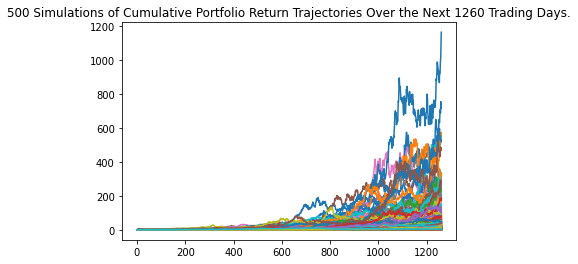

In [213]:
line_plot = MC_joined_even.plot_simulation()

In [214]:
 simulated_returns_data = {
    "mean": list(MC_joined_even.simulated_return.mean(axis=1)),
    "median": list(MC_joined_even.simulated_return.median(axis=1)),
    "min": list(MC_joined_even.simulated_return.min(axis=1)),
    "max": list(MC_joined_even.simulated_return.max(axis=1))
}

In [215]:
df_simulated_returns_even = pd.DataFrame(simulated_returns_data) 

In [216]:
df_simulated_returns_even.head() 

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.003226,1.004823,0.869136,1.132682
2,1.005539,1.005630,0.853079,1.185139
3,1.006715,1.003991,0.828942,1.272425
4,1.010145,1.009930,0.812059,1.270712


In [217]:
def summarize_cumulative_return(self):
        """
        Calculate final summary statistics for Monte Carlo simulated stock data.
        
        """
        
        # Check to make sure that simulation has run previously. 
        if not isinstance(self.simulated_return,pd.DataFrame):
            self.calc_cumulative_return()
            
        metrics = self.simulated_return.iloc[-1].describe()
        ci_series = self.confidence_interval
        ci_series.index = ["95% CI Lower","95% CI Upper"]
        return metrics.append(ci_series)

In [218]:
even_tbl= MC_joined_even.summarize_cumulative_return() 

In [219]:
even_tbl

count            500.000000
mean              37.262636
std               92.917725
min                0.065387
25%                3.636025
50%                9.732675
75%               29.179056
max             1164.316246
95% CI Lower       0.476888
95% CI Upper     283.299868
Name: 1260, dtype: float64

In [222]:
even_ci_lower = round(even_tbl[8]*3429403450,2)
even_ci_upper = round(even_tbl[9]*3429403450,2)

# Print results
print(f"There is a 95% chance that microstrategy's investment of $3,429,403,450 in BTC on the balance sheet"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that microstrategy's investment of $3,429,403,450 in BTC on the balance sheet over the next 5 years will end within in the range of $1635441160.98 and $971549544134.96.


In [280]:
even_ci_lower = round(even_tbl[8]*1612958400,2)
even_ci_upper = round(even_tbl[9]*1612958400,2)

# Print results
print(f"There is a 95% chance that Tesla's investment of $1,612,958,400 in BTC on the balance sheet"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that Tesla's investment of $1,612,958,400 in BTC on the balance sheet over the next 5 years will end within in the range of $769200415.4 and $456950901541.98.


In [288]:
even_ci_lower = round(even_tbl[8]*306163400,2)
even_ci_upper = round(even_tbl[9]*306163400,2)

# Print results
print(f"There is a 95% chance that Square's investment of $306,163,400 in BTC on the balance sheet"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that Square's investment of $306,163,400 in BTC on the balance sheet over the next 5 years will end within in the range of $146005634.4 and $86736050755.65.


In [225]:
weights_eth=[0,1,0.,0,0]
microstrategy_portfolio_eth =closed_data.pct_change().dropna().dot(weights_eth)

In [226]:
microstrategy_portfolio_eth.head()

Date
2017-10-02   -0.016081
2017-10-03   -0.016848
2017-10-04    0.000667
2017-10-05    0.010951
2017-10-06    0.043010
Freq: D, dtype: float64

In [227]:
MC_joined_eth = MCSimulation(
    portfolio_data = joineddata,
    num_simulation = num_sims,
    num_trading_days = 252*5,
    weights= weights_eth
)

In [228]:
MC_joined_eth.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.028111,1.147375,0.995485,0.912784,1.019138,1.080629,0.857120,1.046569,1.054263,1.064846,...,1.007443,1.107708,1.100167,0.988318,1.044850,1.018202,1.006544,1.075568,0.986407,1.013704
2,0.989131,1.245525,0.981447,0.812764,1.112502,1.235818,0.872725,0.984323,1.048140,1.080908,...,0.976738,1.056925,1.137805,0.872062,1.005375,1.033621,0.908881,1.069417,0.939607,1.000879
3,1.050763,1.154185,0.944629,0.736694,1.191284,1.203026,0.759290,1.049116,1.179296,1.014711,...,1.034890,1.079420,1.303242,0.976947,1.048077,1.073147,1.004760,1.005307,0.864266,0.997613
4,1.105829,1.182434,0.974566,0.775632,1.268904,1.305739,0.740202,1.081121,1.284311,1.000987,...,1.050214,1.055177,1.426494,0.852202,1.042738,1.051475,1.072178,1.035268,0.811133,1.040457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,13.982032,139.547052,60.297535,58.772354,691.468430,4.207808,14.852637,12.664762,24.906831,43.895905,...,264.922656,66.856246,5.286080,310.434415,13.723553,100.149647,1.097162,2.621142,63.924597,84.951049
1257,14.253834,128.093998,58.776291,60.635401,765.230277,3.832547,14.705150,12.962027,22.951259,48.238746,...,235.026613,63.151247,5.212715,271.847548,14.729347,93.768738,1.096665,2.732389,61.909058,91.850727
1258,13.756602,122.234431,57.120712,65.283757,806.815372,3.855537,13.925370,13.752115,20.689879,48.887285,...,243.330247,66.471848,5.554880,278.119310,14.592704,85.601256,1.225526,2.666156,57.128817,95.911386
1259,13.398651,118.731569,53.901034,60.182980,721.399287,3.884872,12.501769,14.487674,21.086245,38.975577,...,254.031104,68.612465,6.097413,258.843688,14.163474,82.788058,1.288384,2.827402,57.693691,97.363587


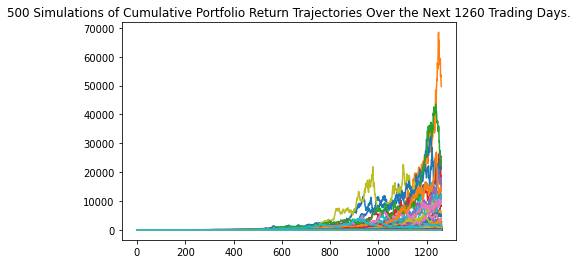

In [229]:
line_plot_eth = MC_joined_eth.plot_simulation()

In [230]:
 simulated_returns_data_eth = {
    "mean": list(MC_joined_eth.simulated_return.mean(axis=1)),
    "median": list(MC_joined_eth.simulated_return.median(axis=1)),
    "min": list(MC_joined_eth.simulated_return.min(axis=1)),
    "max": list(MC_joined_eth.simulated_return.max(axis=1))
}

In [231]:
df_simulated_returns_eth = pd.DataFrame(simulated_returns_data_eth) 

In [232]:
df_simulated_returns_even.head() 

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.003226,1.004823,0.869136,1.132682
2,1.005539,1.005630,0.853079,1.185139
3,1.006715,1.003991,0.828942,1.272425
4,1.010145,1.009930,0.812059,1.270712


In [233]:
def summarize_cumulative_return(self):
        """
        Calculate final summary statistics for Monte Carlo simulated stock data.
        
        """
        
        # Check to make sure that simulation has run previously. 
        if not isinstance(self.simulated_return,pd.DataFrame):
            self.calc_cumulative_return()
            
        metrics = self.simulated_return.iloc[-1].describe()
        ci_series = self.confidence_interval
        ci_series.index = ["95% CI Lower","95% CI Upper"]
        return metrics.append(ci_series)

In [234]:
even_tbl_eth= MC_joined_eth.summarize_cumulative_return() 

In [235]:
even_tbl_eth

count             500.000000
mean              862.412006
std              3556.644510
min                 0.099605
25%                13.819959
50%                71.944898
75%               300.542603
max             49680.339670
95% CI Lower        1.099432
95% CI Upper     8987.352610
Name: 1260, dtype: float64

In [289]:
even_ci_lower = round(even_tbl_eth[8]*3429403450,2)
even_ci_upper = round(even_tbl_eth[9]*3429403450,2)

# Print results
print(f"There is a 95% chance that Microstrategy's investment of $3,429,403,450 in ETH on the balance sheet"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that Microstrategy's investment of $3,429,403,450 in ETH on the balance sheet over the next 5 years will end within in the range of $3770394616.47 and $30821258048066.46.


In [290]:
even_ci_lower = round(even_tbl_eth[8]*1612958400,2)
even_ci_upper = round(even_tbl_eth[9]*1612958400,2)

# Print results
print(f"There is a 95% chance that Tesla's investment of $1,612,958,400 in ETH on the balance sheet"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that Tesla's investment of $1,612,958,400 in ETH on the balance sheet over the next 5 years will end within in the range of $1773337478.84 and $14496225886515.74.


In [292]:
even_ci_lower = round(even_tbl_eth[8]*306163400,2)
even_ci_upper = round(even_tbl_eth[9]*306163400,2)

# Print results
print(f"There is a 95% chance that Square's investment of $306,163,400 in ETH on the balance sheet"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that Square's investment of $306,163,400 in ETH on the balance sheet over the next 5 years will end within in the range of $336605725.15 and $2751598432162.71.


In [240]:
weights_link=[0,0,0,1,0]
microstrategy_portfolio_link =closed_data.pct_change().dropna().dot(weights_link)

In [241]:
microstrategy_portfolio_link.head()

Date
2017-10-02   -0.182940
2017-10-03   -0.031483
2017-10-04    0.149988
2017-10-05    0.023095
2017-10-06    0.170284
Freq: D, dtype: float64

In [242]:
MC_joined_link = MCSimulation(
    portfolio_data = joineddata,
    num_simulation = num_sims,
    num_trading_days = 252*5,
    weights= weights_link
)

In [243]:
MC_joined_link.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005409,1.071310,0.958303,0.961777,1.089459,1.129566,1.096401,0.993387,1.001759,1.050643,...,0.992839,1.036429,1.057985,0.991214,1.157636,0.915305,1.159129,1.018555,0.918299,1.154638
2,1.012099,0.999070,1.002059,0.919593,1.113889,1.103443,1.174591,1.104404,1.228302,1.059581,...,0.978799,1.189238,0.879721,0.958705,1.213784,0.925343,1.092067,1.000288,0.901850,1.241805
3,1.014926,0.877597,1.000758,0.915726,1.272805,1.115307,1.155278,1.188513,1.155917,1.133918,...,1.055344,1.032986,0.994271,1.057566,1.152671,0.922191,0.962677,1.005852,0.871455,1.251511
4,1.080812,0.943498,1.035447,0.908677,1.351224,1.117084,1.280519,1.304771,1.215615,1.134649,...,1.085201,0.899956,0.970689,0.921918,1.022169,0.896853,0.968353,0.913281,0.895306,1.387618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,15438.725370,509770.820324,8620.118742,2713.899181,10788.321067,35.029257,1197.428290,96.748701,11.260744,12359.179179,...,2551.672943,3.814298,227.191930,3483.163730,954.502504,9494.483196,1.562869,1.400016,806.531547,223.110426
1257,15589.146196,509585.047880,9339.015317,2669.889822,10802.155141,34.006978,1455.059724,93.453676,11.124998,12162.747773,...,2254.323867,3.841738,239.938313,3422.231990,927.136387,8712.888283,1.389492,1.525714,773.570582,199.540339
1258,14520.264937,529039.640177,10833.188570,2663.820699,10315.710472,30.970431,1362.923535,89.383138,11.924158,12631.331040,...,2304.753465,3.990812,254.876858,3333.890448,918.542692,7534.694936,1.353659,1.502673,825.137525,195.357550
1259,15194.003911,500680.004446,11516.293707,2726.110936,10589.828724,33.930013,1344.389263,81.091053,12.213615,10974.050089,...,2274.205491,4.137483,269.153505,4158.090847,901.026861,8262.805327,1.443163,1.529183,685.240734,202.987138


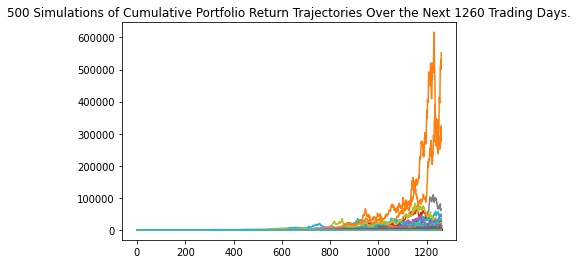

In [244]:
line_plot_link = MC_joined_link.plot_simulation()

In [245]:
 simulated_returns_data_link = {
    "mean": list(MC_joined_link.simulated_return.mean(axis=1)),
    "median": list(MC_joined_link.simulated_return.median(axis=1)),
    "min": list(MC_joined_link.simulated_return.min(axis=1)),
    "max": list(MC_joined_link.simulated_return.max(axis=1))
}

In [246]:
df_simulated_returns_link = pd.DataFrame(simulated_returns_data_link) 

In [247]:
df_simulated_returns_link.head() 

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.008340,1.006998,0.745261,1.268962
2,1.015269,1.011096,0.671953,1.380972
3,1.026436,1.015322,0.583030,1.446024
4,1.034198,1.018979,0.547186,1.685326


In [248]:
def summarize_cumulative_return(self):
        """
        Calculate final summary statistics for Monte Carlo simulated stock data.
        
        """
        
        # Check to make sure that simulation has run previously. 
        if not isinstance(self.simulated_return,pd.DataFrame):
            self.calc_cumulative_return()
            
        metrics = self.simulated_return.iloc[-1].describe()
        ci_series = self.confidence_interval
        ci_series.index = ["95% CI Lower","95% CI Upper"]
        return metrics.append(ci_series)

In [249]:
even_tbl_link = MC_joined_link.summarize_cumulative_return() 

In [250]:
even_tbl_link

count              500.000000
mean              3223.835908
std              28044.444630
min                  0.013197
25%                 13.554361
50%                 85.698121
75%                605.351523
max             552663.598911
95% CI Lower         0.275009
95% CI Upper     16755.663726
Name: 1260, dtype: float64

In [252]:
even_ci_lower = round(even_tbl_link[8]*3429403450,2)
even_ci_upper = round(even_tbl_link[9]*3429403450,2)

# Print results
print(f"There is a 95% chance that microstrategy's investment of $3,429,403,450 in link on the balance sheet"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that microstrategy's investment of $3,429,403,450 in link on the balance sheet over the next 5 years will end within in the range of $943116769.49 and $57461930988571.62.


In [282]:
even_ci_lower = round(even_tbl_link[8]*1612958400,2)
even_ci_upper = round(even_tbl_link[9]*1612958400,2)

# Print results
print(f"There is a 95% chance that Tesla's investment of $1,612,958,400 in link on the balance sheet"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that Tesla's investment of $1,612,958,400 in link on the balance sheet over the next 5 years will end within in the range of $443578055.98 and $27026188554232.92.


In [293]:
even_ci_lower = round(even_tbl_link[8]*306163400,2)
even_ci_upper = round(even_tbl_link[9]*306163400,2)

# Print results
print(f"There is a 95% chance that Square's investment of $306,163,400 in link on the balance sheet"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that Square's investment of $306,163,400 in link on the balance sheet over the next 5 years will end within in the range of $84197686.55 and $5129970975571.99.


In [253]:
weights_even_cardano=[0,0.,1,0,0]
microstrategy_portfolio_cardano =closed_data.pct_change().dropna().dot(weights_even_cardano)

In [254]:
microstrategy_portfolio_cardano.head()

Date
2017-10-02    0.038539
2017-10-03   -0.197287
2017-10-04    0.053599
2017-10-05   -0.020190
2017-10-06   -0.137263
Freq: D, dtype: float64

In [255]:
MC_joined_cardano = MCSimulation(
    portfolio_data = joineddata,
    num_simulation = num_sims,
    num_trading_days = 252*5,
    weights= weights_even_cardano
)

In [256]:
MC_joined_cardano.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.979880,1.189854,0.918542,1.087913,1.196381,1.186273,0.859908,1.071262,0.993859,0.877421,...,1.114931,0.979321,1.081320,1.021575,0.909920,0.977361,1.052943,0.997239,0.872199,1.025749
2,1.060573,1.075012,0.938298,1.098438,1.196321,1.291394,0.956849,0.996316,1.117685,0.865540,...,1.175406,0.978798,1.061494,0.842950,0.916984,0.933551,1.088859,1.028490,0.967409,0.916266
3,1.163033,0.890587,0.866513,1.230555,1.249632,1.451813,1.047110,1.227973,1.105975,0.856962,...,1.189307,0.987731,1.050732,0.840112,0.847977,1.059059,1.058503,0.919577,0.855570,0.963042
4,1.243050,0.880106,0.861441,1.372813,1.309591,1.544038,1.144483,1.354025,1.191457,0.838441,...,1.075967,0.922650,0.980655,0.707662,0.876058,1.394875,1.148092,0.859376,0.879388,0.922367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,3.658341,55.254657,2.373752,177.310537,28.014361,19.925602,2.035302,1.988015,29.694474,15.627910,...,135.414824,1758.421124,1.179832,1681.768073,0.646623,154.399705,0.397595,3.451070,1166.812385,15.619695
1257,3.983696,53.516285,2.592135,190.531223,24.497051,16.919877,1.865261,1.583947,33.081324,13.776409,...,148.145402,1711.041620,1.313421,1555.311447,0.627976,162.906487,0.396491,3.172303,1167.147236,13.891973
1258,4.111599,51.697137,2.643688,164.239543,29.424018,16.524561,2.093502,1.698057,35.947821,14.468785,...,149.078548,1678.930450,1.209665,1535.470846,0.618852,149.680398,0.369798,2.874867,1075.873869,14.575034
1259,3.980011,54.589919,2.970584,140.346433,27.006531,16.305913,2.332488,1.785695,35.235897,13.550662,...,150.054883,1726.573984,1.259846,1670.354768,0.612050,146.613925,0.415945,3.116688,1230.742673,13.272061


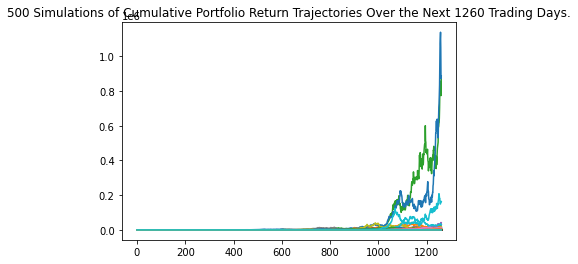

In [257]:
line_plot_cardano = MC_joined_cardano.plot_simulation()

In [258]:
 simulated_returns_data_cardano = {
    "mean": list(MC_joined_cardano.simulated_return.mean(axis=1)),
    "median": list(MC_joined_cardano.simulated_return.median(axis=1)),
    "min": list(MC_joined_cardano.simulated_return.min(axis=1)),
    "max": list(MC_joined_cardano.simulated_return.max(axis=1))
}

In [259]:
df_simulated_returns_cardano = pd.DataFrame(simulated_returns_data_cardano) 

In [260]:
df_simulated_returns_cardano.head() 

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.008366,1.005977,0.687512,1.282918
2,1.013026,1.008678,0.689033,1.373709
3,1.014431,1.000608,0.528420,1.528756
4,1.024703,0.995288,0.518666,1.594587


In [261]:
def summarize_cumulative_return(self):
        """
        Calculate final summary statistics for Monte Carlo simulated stock data.
        
        """
        
        # Check to make sure that simulation has run previously. 
        if not isinstance(self.simulated_return,pd.DataFrame):
            self.calc_cumulative_return()
            
        metrics = self.simulated_return.iloc[-1].describe()
        ci_series = self.confidence_interval
        ci_series.index = ["95% CI Lower","95% CI Upper"]
        return metrics.append(ci_series)

In [262]:
even_tbl_cardano = MC_joined_cardano.summarize_cumulative_return() 

In [263]:
even_tbl_cardano

count              500.000000
mean              4770.091814
std              56267.228591
min                  0.007661
25%                  3.639104
50%                 32.339516
75%                299.306036
max             887458.753619
95% CI Lower         0.173718
95% CI Upper     10675.227108
Name: 1260, dtype: float64

In [264]:
even_ci_lower = round(even_tbl_cardano[8]*3429403450,2)
even_ci_upper = round(even_tbl_cardano[9]*3429403450,2)

# Print results
print(f"There is a 95% chance that microstrategy's investment of $3,429,403,450 in ADA on the balance sheet"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that microstrategy's investment of $3,429,403,450 in ADA on the balance sheet over the next 5 years will end within in the range of $595749687.82 and $36609660674658.33.


In [283]:
even_ci_lower = round(even_tbl_cardano[8]*1612958400,2)
even_ci_upper = round(even_tbl_cardano[9]*1612958400,2)

# Print results
print(f"There is a 95% chance that Tesla's investment of $1,612,958,400 in ADA on the balance sheet"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that Tesla's investment of $1,612,958,400 in ADA on the balance sheet over the next 5 years will end within in the range of $280200179.79 and $17218697236202.94.


In [294]:
even_ci_lower = round(even_tbl_cardano[8]*306163400,2)
even_ci_upper = round(even_tbl_cardano[9]*306163400,2)

# Print results
print(f"There is a 95% chance that Square's investment of $306,163,400 in ADA on the balance sheet"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that Square's investment of $306,163,400 in ADA on the balance sheet over the next 5 years will end within in the range of $53186145.24 and $3268363827242.22.


In [266]:
weights_even_dot=[0,0.,0,0,1]
microstrategy_portfolio_dot =closed_data.pct_change().dropna().dot(weights_even_dot)

In [267]:
microstrategy_portfolio_dot.head()

Date
2017-10-02   -0.018670
2017-10-03    0.003168
2017-10-04    0.056345
2017-10-05    0.103560
2017-10-06   -0.012560
Freq: D, dtype: float64

In [268]:
MC_joined_dot = MCSimulation(
    portfolio_data = joineddata,
    num_simulation = num_sims,
    num_trading_days = 252*5,
    weights= weights_even_dot
)

In [269]:
MC_joined_dot.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.017999,0.902615,0.878324,1.051222,0.899913,0.985377,1.070850,0.963891,0.980283,1.028410,...,1.068481,1.045884,1.041871,0.950707,1.202700,0.869007,0.900002,0.880791,0.991522,1.144927
2,0.947890,0.840775,1.006261,1.171985,0.815075,1.094192,1.151397,0.968242,0.976571,0.927866,...,1.000235,1.175571,1.037061,0.935492,1.241725,0.970360,1.041725,0.883111,0.927862,1.355689
3,0.972358,0.855421,1.002459,1.360209,0.812907,1.049642,1.098966,1.033530,1.151449,0.903201,...,1.057619,0.971295,1.031456,0.805969,1.115908,1.044850,0.898133,0.942621,0.904387,1.249099
4,1.038421,0.903431,1.113154,1.536933,0.745165,1.064013,1.162138,0.862622,1.212746,1.018019,...,1.040468,0.826600,1.092310,0.776760,1.180381,1.039591,0.938042,0.870551,0.814675,1.246405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.318195,64.788881,3.079503,988.028700,0.934939,3.633959,25.061360,600.323937,12.198566,136.203529,...,26.592043,240.399656,0.085771,2327.856148,0.170332,0.178618,250.865589,46.246120,0.060539,4.403703
1257,0.289068,69.035121,2.724899,923.511232,0.948275,4.059778,26.966638,633.001251,12.603816,141.643682,...,26.638581,248.810234,0.090984,2140.921209,0.146694,0.177225,230.728574,51.701913,0.052123,4.010793
1258,0.274427,70.334338,2.779514,986.652462,0.941216,4.552817,22.493697,570.734183,12.057386,146.411887,...,27.698004,270.283307,0.081134,2076.303013,0.135605,0.195055,215.853549,48.002559,0.053202,3.821208
1259,0.257055,72.458581,2.643429,1041.086187,0.951174,4.987186,21.484986,652.746982,13.886127,142.473302,...,26.917149,249.291162,0.079067,2344.614680,0.141393,0.194470,221.675260,47.288761,0.050910,4.219383


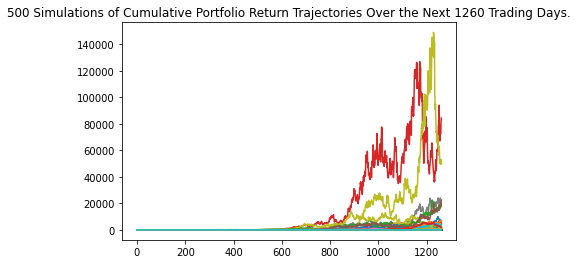

In [271]:
line_plot_dot = MC_joined_dot.plot_simulation()

In [272]:
 simulated_returns_data_dot = {
    "mean": list(MC_joined_dot.simulated_return.mean(axis=1)),
    "median": list(MC_joined_dot.simulated_return.median(axis=1)),
    "min": list(MC_joined_dot.simulated_return.min(axis=1)),
    "max": list(MC_joined_dot.simulated_return.max(axis=1))
}

In [273]:
df_simulated_returns_dot = pd.DataFrame(simulated_returns_data_dot) 

In [274]:
df_simulated_returns_dot.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,0.999700,1.000332,0.729489,1.224439
2,1.009110,1.005089,0.631973,1.355689
3,1.011200,1.010049,0.561937,1.420518
4,1.019986,1.019902,0.559572,1.536933


In [275]:
def summarize_cumulative_return(self):
        """
        Calculate final summary statistics for Monte Carlo simulated stock data.
        
        """
        
        # Check to make sure that simulation has run previously. 
        if not isinstance(self.simulated_return,pd.DataFrame):
            self.calc_cumulative_return()
            
        metrics = self.simulated_return.iloc[-1].describe()
        ci_series = self.confidence_interval
        ci_series.index = ["95% CI Lower","95% CI Upper"]
        return metrics.append(ci_series)

In [276]:
even_tbl_dot = MC_joined_dot.summarize_cumulative_return() 

In [277]:
even_tbl_dot

count             500.000000
mean              546.180386
std              4711.145899
min                 0.001599
25%                 0.778560
50%                 6.020430
75%                37.715837
max             84493.397106
95% CI Lower        0.022852
95% CI Upper     2594.936839
Name: 1260, dtype: float64

In [278]:
even_ci_lower = round(even_tbl_dot[8]*3429403450,2)
even_ci_upper = round(even_tbl_dot[9]*3429403450,2)

# Print results
print(f"There is a 95% chance that microstrategy's investment of $3,429,403,450 in DOT on the balance sheet"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that microstrategy's investment of $3,429,403,450 in DOT on the balance sheet over the next 5 years will end within in the range of $78368262.37 and $8899085349073.45.


In [295]:
even_ci_lower = round(even_tbl_dot[8]*1612958400,2)
even_ci_upper = round(even_tbl_dot[9]*1612958400,2)

# Print results
print(f"There is a 95% chance that Tesla's investment of $1,612,958,400 in DOT on the balance sheet"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that Tesla's investment of $1,612,958,400 in DOT on the balance sheet over the next 5 years will end within in the range of $36859106.53 and $4185525172345.92.


In [296]:
even_ci_lower = round(even_tbl_dot[8]*306163400,2)
even_ci_upper = round(even_tbl_dot[9]*306163400,2)

# Print results
print(f"There is a 95% chance that Square's investment of $306,163,400 in DOT on the balance sheet"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that Square's investment of $306,163,400 in DOT on the balance sheet over the next 5 years will end within in the range of $6996404.48 and $794474685491.59.
